In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import chardet
   
   
# read in some data
df = pd.read_csv("/content/drive/Shared drives/OPIM 5770 Advanced BAPM Team 2/Data/Content Data/Questions and Answers.csv", encoding='latin1')

In [ ]:
df

,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Question,Question URL,Number of Answers,Answer by Manufacturer,Answer by Manufacturer Date,Manufacturer Answer Text,Answer by Seller,Answer by Seller Date,Seller Answer Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6
0,2010-01-01,United States,"Walmart 3P (Dallas, TX 75201)",7.874201e+10,NaN,550198067,NaN,Great Value Ultimate Fresh Liquid Fabric Softe...,Where are thecustomer's review about this prod...,https://www.walmart.com/ip/Great-Value-Ultimat...,3,No,-,-,No,-,-,Henkel,Great Value,NaN,882914615,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
1,2010-01-01,United States,"Walmart 1P (Dallas, TX 75201)",7.874201e+10,NaN,550198067,NaN,Great Value Ultimate Fresh Liquid Fabric Softe...,Where are thecustomer's review about this prod...,https://www.walmart.com/ip/Great-Value-Ultimat...,3,No,-,-,No,-,-,Henkel,Great Value,NaN,882914615,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
2,2010-01-01,United States,"Walmart 3P (Dallas, TX 75201)",7.874201e+10,NaN,550198067,NaN,Great Value Ultimate Fresh Liquid Fabric Softe...,Does Great Value brand test on animals?,https://www.walmart.com/ip/Great-Value-Ultimat...,1,No,-,-,No,-,-,Henkel,Great Value,NaN,882914615,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
3,2010-01-01,United States,"Walmart 1P (Dallas, TX 75201)",7.874201e+10,NaN,550198067,NaN,Great Value Ultimate Fresh Liquid Fabric Softe...,Does Great Value brand test on animals?,https://www.walmart.com/ip/Great-Value-Ultimat...,1,No,-,-,No,-,-,Henkel,Great Value,NaN,882914615,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
4,2010-01-01,United States,"Walmart 3P (Dallas, TX 75201)",7.261371e+10,NaN,551094702,NaN,"Sun Powder Laundry Detergent Clean & Fresh, 12...",Is it safe for He ? I noticed the liquid says ...,https://www.walmart.com/ip/Sun-Clean-Fresh-120...,0,No,-,-,No,-,-,Henkel,Sun,NaN,882914638,HDD VfM *** VfM Universal powder,Laundry Care *** Laundry Detergent *** Powder ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,2020-08-26,United States,Amazon 1P,2.420009e+10,NaN,B00VKBFNMS,NaN,"Persil ProClean Liquid Laundry Detergent, Inte...",Is this safe for septic systems?,https://www.amazon.com/ask/questions/Tx2WAQCW2...,4,Yes,2020-08-26,"Yes, Persil ProClean Liquid Laundry Detergent ...",No,-,-,Henkel,Persil,NaN,882914562,HDD LP *** LP Universal liquid,Laundry Care *** Laundry Detergent *** Liquid ...,Target Priority SKUs,NaN,NaN,NaN
6555,2020-08-26,United States,Amazon 3P,2.420009e+10,NaN,B00VKBFNMS,NaN,"Persil ProClean Liquid Laundry Detergent, Inte...",Is this safe for septic systems?,https://www.amazon.com/ask/questions/Tx2WAQCW2...,4,Yes,2020-08-26,"Yes, Persil ProClean Liquid Laundry Detergent ...",No,-,-,Henkel,Persil,NaN,882914562,HDD LP *** LP Universal liquid,Laundry Care *** Laundry Detergent *** Liquid ...,Target Priority SKUs,NaN,NaN,NaN
6556,2020-08-26,United States,Amazon Prime Pantry,2.420007e+10,NaN,B01N9Q55IO,NaN,"Persil ProClean Liquid Laundry Detergent, Orig...",Is this safe for septic systems?,https://www.amazon.com/ask/questions/Tx2WAQCW2...,2,Yes,2020-08-26,"Yes, Persil ProClean Liquid Laundry Detergent ...",No,-,-,Henkel,Persil,NaN,882914572,HDD LP *** LP Universal liquid,Laundry Care *** Laundry Detergent *** Liquid ...,NaN,NaN,NaN,NaN
6557,2020-08-27,United States,Amazon 1P,2.420009e+10,NaN,B00VKBFNKU,NaN,"Persil ProClean Liquid Laundry Detergent, Orig...",Is Persil safe on dark colors?,https://www.amazon.com/ask/questions/Tx33RXVK6...,5,Yes,2020-08-27,Persil is safe for colors and whites. Please a...,No,-,-,Henkel,Persil,NaN,882914567,Amazon Prime Prio

In [ ]:
# Run in python console
import nltk; nltk.download('stopwords')

# Run in terminal or command prompt
#python3 -m spacy download en
nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'that', 'and',  'in','will','be','like','can','seem','issue'])

In [ ]:
# Convert to list
data = df.Question.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Where are thecustomers review about this product?']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['where', 'are', 'thecustomers', 'review', 'about', 'this', 'product']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['where', 'are', 'thecustomers_review', 'about', 'this', 'product']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['product']]


In [1]:
print(data_lemmatized[:20])

NameError: ignored

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


In [ ]:
id2word[0]

'product'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('product', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.083*"list" + 0.083*"time" + 0.065*"oil" + 0.054*"pick" + 0.050*"delivery" '
  '+ 0.049*"drop" + 0.048*"sulfate" + 0.034*"brand" + 0.031*"leak" + '
  '0.027*"measure"'),
 (1,
  '0.168*"scent" + 0.101*"colored" + 0.086*"stain" + 0.072*"need" + '
  '0.056*"buy" + 0.051*"can" + 0.046*"fresh" + 0.045*"add" + 0.042*"change" + '
  '0.034*"car"'),
 (2,
  '0.257*"safe" + 0.102*"bleach" + 0.086*"system" + 0.084*"laundry" + '
  '0.066*"top" + 0.044*"tank" + 0.031*"loading" + 0.026*"acrylic" + '
  '0.026*"damage" + 0.025*"bottom"'),
 (3,
  '0.572*"product" + 0.079*"refill" + 0.046*"animal" + 0.037*"subscription" + '
  '0.032*"test" + 0.029*"review" + 0.025*"resolve" + 0.025*"several_review" + '
  '0.018*"glass" + 0.015*"expiration_date"'),
 (4,
  '0.378*"free" + 0.119*"clear" + 0.054*"deliver" + 0.051*"well" + '
  '0.048*"measurement" + 0.044*"cruelty" + 0.022*"info" + 0.022*"check" + '
  '0.018*"cloth" + 0.017*"diaper"'),
 (5,
  '0.131*"say" + 0.124*"smell" + 0.079*"dye" + 0.078*"persil

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.637227025977185

Coherence Score:  0.5833470581941761


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.420884 -0.182256       1        1  9.395961
15     0.096542  0.312684       2        1  7.569741
5      0.023774  0.053917       3        1  6.713770
7     -0.002251 -0.002303       4        1  5.913762
1      0.003204  0.013067       5        1  5.720823
14     0.080420  0.245616       6        1  5.679615
3      0.006141  0.004106       7        1  5.236234
2     -0.004551 -0.020630       8        1  4.963537
11    -0.060527 -0.054761       9        1  4.869197
9     -0.044918 -0.040325      10        1  4.659762
6     -0.043372 -0.041933      11        1  4.505647
8     -0.061975 -0.038309      12        1  4.333104
0     -0.046866 -0.049341      13        1  4.314506
13    -0.033234  0.043403      14        1  3.983749
18    -0.035799 -0.003181      15        1  3.839995
19    -0.059462 -0.056907      16        1  3.804757
12    -0.067529 -0.061315      17        1  3.731909
4     -0.035501 -0.024274      18        1  3.618387
17    -0.063125 -0.040786      19        1  3.595784
10    -0.071856 -0.056473      20        1  3.549762, topic_info=             Term         Freq        Total Category  logprob  loglift
57            use  1158.000000  1158.000000  Default  30.0000  30.0000
0         product   760.000000   760.000000  Default  29.0000  29.0000
49           free   347.000000   347.000000  Default  28.0000  28.0000
71         clothe   333.000000   333.000000  Default  27.0000  27.0000
11           safe   323.000000   323.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1166        weigh     6.120490     6.985853  Topic20  -4.9915   3.2060
461   instruction     5.502422     6.325264  Topic20  -5.0979   3.1989
163        toilet     4.811283     5.634125  Topic20  -5.2321   3.1804
1329         disk     5.928386     9.187198  Topic20  -5.0234   2.9002
1330       macine     5.928386     9.187198  Topic20  -5.0234   2.9002

[678 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
896       3  0.913246       able
58        9  0.968668       acid
1235      8  0.966522    acrylic
541       4  0.989325   actually
180       5  0.981513        add
...     ...       ...        ...
227      17  0.996555      would
736      14  0.919128      wrong
628       2  0.919679       year
868      11  0.993434  yesterday
1034     16  0.889582      yyour

[693 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 16, 6, 8, 2, 15, 4, 3, 12, 10, 7, 9, 1, 14, 19, 20, 13, 5, 18, 11])

In [ ]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#!unzip mallet-2.0.8.zip


--2020-10-08 20:58:39--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.7’

mallet-2.0.8.zip.7  100%[===================>]  15.43M  11.2MB/s    in 1.4s    

2020-10-08 20:58:40 (11.2 MB/s) - ‘mallet-2.0.8.zip.7’ saved [16184794/16184794]



In [ ]:
!ls

drive		  mallet-2.0.8.zip.1  mallet-2.0.8.zip.4  mallet-2.0.8.zip.7
mallet-2.0.8	  mallet-2.0.8.zip.2  mallet-2.0.8.zip.5  sample_data
mallet-2.0.8.zip  mallet-2.0.8.zip.3  mallet-2.0.8.zip.6


In [ ]:
mallet_path = ('mallet-2.0.8/bin/mallet')

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(9,
  [('sensitive', 0.1325071496663489),
   ('small', 0.09723546234509056),
   ('large', 0.0905624404194471),
   ('skin', 0.08484270734032412),
   ('powder', 0.057197330791229746),
   ('laundry', 0.05052430886558627),
   ('sell', 0.03813155386081983),
   ('easy', 0.034318398474737846),
   ('concentrate', 0.032411820781696854),
   ('allergy', 0.03145853193517636)]),
 (3,
  [('smell', 0.20330237358101136),
   ('odor', 0.0608875128998968),
   ('container', 0.04643962848297214),
   ('carpet', 0.04540763673890609),
   ('sulfate', 0.03611971104231166),
   ('rid', 0.03611971104231166),
   ('dispenser', 0.02786377708978328),
   ('similar', 0.025799793601651185),
   ('febreze', 0.022703818369453045),
   ('strong', 0.021671826625386997)]),
 (11,
  [('safe', 0.4255111976630964),
   ('system', 0.10223953261927946),
   ('baby', 0.09931840311587146),
   ('clothe', 0.04673807205452775),
   ('month', 0.043816942551119765),
   ('septic', 0.0379746835443038),
   ('tank', 0.03602726387536514),
   ('pet

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


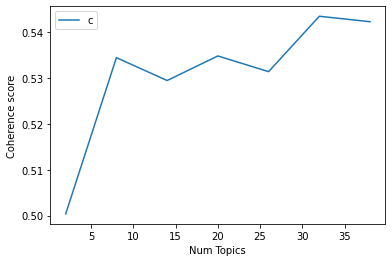

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5004
Num Topics = 8  has Coherence Value of 0.5345
Num Topics = 14  has Coherence Value of 0.5295
Num Topics = 20  has Coherence Value of 0.5348
Num Topics = 26  has Coherence Value of 0.5314
Num Topics = 32  has Coherence Value of 0.5435
Num Topics = 38  has Coherence Value of 0.5423


In [ ]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.109*"free" + 0.092*"kill" + 0.087*"product" + 0.062*"clear" + '
  '0.059*"roach" + 0.049*"ant" + 0.039*"baby" + 0.019*"car" + 0.017*"month" + '
  '0.015*"eat"'),
 (1,
  '0.215*"product" + 0.169*"safe" + 0.091*"scent" + 0.044*"animal" + '
  '0.042*"system" + 0.039*"package" + 0.033*"test" + 0.020*"lavender" + '
  '0.018*"carpet" + 0.017*"understand"'),
 (2,
  '0.099*"ingredient" + 0.076*"smell" + 0.069*"find" + 0.055*"box" + '
  '0.039*"bleach" + 0.036*"original" + 0.033*"fragrance" + 0.031*"sheet" + '
  '0.025*"pack" + 0.024*"list"'),
 (3,
  '0.119*"machine" + 0.107*"work" + 0.098*"washer" + 0.046*"washing" + '
  '0.040*"buy" + 0.039*"small" + 0.036*"top" + 0.036*"large" + 0.036*"wash" + '
  '0.035*"container"'),
 (4,
  '0.066*"product" + 0.056*"sensitive" + 0.055*"persil" + 0.044*"item" + '
  '0.044*"stain" + 0.043*"order" + 0.042*"remove" + 0.042*"white" + '
  '0.036*"skin" + 0.028*"long"'),
 (5,
  '0.113*"make" + 0.079*"water" + 0.071*"bottle" + 0.057*"liquid" + '
  '0.046

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.1378,"product, safe, scent, animal, system, package,...",Where are thecustomers review about this product?
1,1,1.0,0.1378,"product, safe, scent, animal, system, package,...",Where are thecustomers review about this product?
2,2,1.0,0.1536,"product, safe, scent, animal, system, package,...",Does Great Value brand test on animals?
3,3,1.0,0.1557,"product, safe, scent, animal, system, package,...",Does Great Value brand test on animals?
4,4,5.0,0.1500,"make, water, bottle, liquid, borax, clean, fab...",Is it safe for He ? I noticed the liquid says ...
5,5,5.0,0.1500,"make, water, bottle, liquid, borax, clean, fab...",Is it safe for He ? I noticed the liquid says ...
6,6,1.0,0.1313,"product, safe, scent, animal, system, package,...",Where are thecustomers review about this product?
7,7,1.0,0.1378,"product, safe, scent, animal, system, package,...",Where are thecustomers review about this product?
8,8,1.0,0.1557,"product, safe, scent, animal, system, package,...",Does Great Value brand test on animals?
9,9,1.0,0.1557,"product, safe, scent, animal, system, package,...",Does Great Value brand test on animals?


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(15)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2708,"free, kill, product, clear, roach, ant, baby, ...",i am worried if roaches or waterbugs (i have b...
1,1.0,0.1986,"product, safe, scent, animal, system, package,...","The product information states, ""safe for stan..."
2,2.0,0.2336,"ingredient, smell, find, box, bleach, original...",Does this detergent have the awful baby powder...
3,3.0,0.2383,"machine, work, washer, washing, buy, small, to...",Med-small load of moderately soiled clothes- h...
4,4.0,0.2567,"product, sensitive, persil, item, stain, order...",Does this product remove oil/sweat stains like...
5,5.0,0.2336,"make, water, bottle, liquid, borax, clean, fab...",One of the bottles lid was not secure for the ...
6,6.0,0.2542,"clothe, good, color, black, odor, put, oil, co...",Can I twist the plug so the freshener is horiz...
7,7.0,0.2782,"detergent, load, version, regular, pod, add, c...","From looking at customer pics, are these suppo..."


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.set_option('display.max_columns', None)
df_dominant_topics

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.set_option('display.max_columns', None)
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2708,"free, kill, product, clear, roach, ant, baby, ...",i am worried if roaches or waterbugs (i have b...
1,1.0,0.1986,"product, safe, scent, animal, system, package,...","The product information states, ""safe for stan..."
2,2.0,0.2336,"ingredient, smell, find, box, bleach, original...",Does this detergent have the awful baby powder...
3,3.0,0.2383,"machine, work, washer, washing, buy, small, to...",Med-small load of moderately soiled clothes- h...
4,4.0,0.2567,"product, sensitive, persil, item, stain, order...",Does this product remove oil/sweat stains like...
5,5.0,0.2336,"make, water, bottle, liquid, borax, clean, fab...",One of the bottles lid was not secure for the ...
6,6.0,0.2542,"clothe, good, color, black, odor, put, oil, co...",Can I twist the plug so the freshener is horiz...
7,7.0,0.2782,"detergent, load, version, regular, pod, add, c...","From looking at customer pics, are these suppo..."


In [ ]:
df.reset_index(inplace=True)
#df = pd.merge(df,df_dominant_topics)

In [ ]:
df_dominant_topics.reset_index(inplace = True)

In [ ]:
#df_dominant_topics.drop('index',axis=1, inplace=True)

In [ ]:
df_dominant_topics.columns

Index(['level_0', 'index', 'Dominant_Topic', 'Topic_Keywords', 'Num_Documents',
       'Perc_Documents'],
      dtype='object')

In [ ]:
df = pd.merge(df,df_dominant_topics)
finaldata = df.merge(df_dominant_topics, left_on='index', right_on='index',
                         how='outer', suffixes=('', '_y'))

In [ ]:
df.tail(30)

,index,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Question,Question URL,Number of Answers,Answer by Manufacturer,Answer by Manufacturer Date,Manufacturer Answer Text,Answer by Seller,Answer by Seller Date,Seller Answer Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6,level_0,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
6529,6529,2020-08-21,United States,Amazon 3P,2.340001e+10,NaN,B01NBJZ2F8,NaN,20 Mule Team Borax Detergent Booster & Multi-P...,"Would it help to remove black stain or mold , ...",https://www.amazon.com/ask/questions/Tx1KIR03N...,3,Yes,2020-08-21,20 Mule Team Borax is a great Bathroom Cleaner...,No,-,-,Henkel,20 Mule Team,NaN,882914667,Amazon Priority SKUs,LAD *** LAD Stain removers,Laundry Care *** Laundry Additives *** Deterge...,NaN,NaN,NaN,6529,4.0,"product, sensitive, persil, item, stain, order...",NaN,NaN
6530,6530,2020-08-22,United States,Amazon 1P,2.340097e+10,NaN,B000BQT5IG,NaN,"Combat Max Ant Killing Gel, Indoor and Outdoor...",Does it work for cockroaches?,https://www.amazon.com/ask/questions/Tx1IYCUW9...,3,Yes,2020-08-24,Combat Ant Killing Gel is formulated for ants....,No,-,-,Henkel,Combat,NaN,882914608,Home Care *** Pest Control *** Gel,IC *** IC Crawling,NaN,NaN,NaN,NaN,6530,3.0,"machine, work, washer, washing, buy, small, to...",NaN,NaN
6531,6531,2020-08-22,United States,Amazon 3P,2.340097e+10,NaN,B000BQT5IG,NaN,"Combat Max Ant Killing Gel, Indoor and Outdoor...",Does it work for cockroaches?,https://www.amazon.com/ask/questions/Tx1IYCUW9...,3,Yes,2020-08-24,Combat Ant Killing Gel is formulated for ants....,No,-,-,Henkel,Combat,NaN,882914608,Home Care *** Pest Control *** Gel,IC *** IC Crawling,NaN,NaN,NaN,NaN,6531,0.0,"free, kill, product, clear, roach, ant, baby, ...",NaN,NaN
6532,6532,2020-08-22,United States,Amazon 1P,7.261374e+10,NaN,B07RKCN519,NaN,"all Baby Liquid Laundry Detergent, Gentle for ...",What's the difference between this and 'Free a...,https://www.amazon.com/ask/questions/Tx13QOGSB...,1,No,-,-,No,-,-,Henkel,All,NaN,882914656,HDD LP *** LP Universal liquid,Laundry Care *** Laundry Detergent *** Liquid ...,NaN,NaN,NaN,NaN,6532,0.0,"free, kill, product, clear, roach, ant, baby, ...",NaN,NaN
6533,6533,2020-08-22,United States,Amazon 3P,7.261374e+10,NaN,B07RKCN519,NaN,"all Baby Liquid Laundry Detergent, Gentle for ...",What's the difference between this and 'Free a...,https://www.amazon.com/ask/questions/Tx13QOGSB...,1,No,-,-,No,-,-,Henkel,All,NaN,882914656,HDD LP *** LP Universal liquid,Laundry Care *** Laundry Detergent *** Liquid ...,NaN,NaN,NaN,NaN,6533,0.0,"free, kill, product, clear, roach, ant, baby, ...",NaN,NaN
6534,6534,2020-08-22,United States,Amazon 1P,2.420004e+10,NaN,B07RCZVRHB,NaN,"Persil ProClean Laundry Detergent Discs, Origi...",Are these safe for septic tanks?,https://www.amazon.com/ask/questions/Tx2A8W9KC...,8,Yes,2020-08-24,Yes Persil ProClean Discs are septic safe.,No,-,-,Henkel,Persil,NaN,882914672,HDD LP *** LP Universal caps,Laundry Care *** Laundry Detergent *** Unit Do...,NaN,NaN,NaN,NaN,6534,1.0,"product, safe, scent, animal, system, package,...",NaN,NaN
6535,6535,2020-08-22,United States,Amazon 3P,2.420004e+10,NaN,B07RCZVRHB,NaN,"Persil ProClean Laundry Detergent Discs, Origi...",Are these safe for septic tanks?,https://www.amazon.com/ask/questions/Tx2A8W9KC...,8,Yes,2020-08-24,Yes Persil ProClean Discs are septic safe.,No,-,-,Henkel,Persil,NaN,882914672,HDD LP *** LP Universal caps,Laundry Care *** Laundry Detergent *** Unit Do...,NaN,NaN,NaN,NaN,6535,1.0,"product, safe, scent, animal, system, package,...",NaN,NaN
6536,6536,2020-08-22,United States,"Target (Baltimore, MD 21224)",7.261346e+10,NaN,48637582,NaN,all Liquid Laundry Detergent with OXI Stain Re...,Can this be used on black colored clothing? Or...,https://www.target.com/p/all-liquid-laundry-de...,1,Yes,2020-08-24,All Ultra is safe with all colors of

In [ ]:
df.to_csv("/content/drive/Shared drives/OPIM 5770 Advanced BAPM Team 2/Data/Content Data/questions_full_data/questions_full.csv")